<a href="https://colab.research.google.com/github/swati-singh23/Nut-Bolt-Detection/blob/main/Detection_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

# Define the directories
source_dir = "/content/drive/MyDrive/dataset_for_detection/Rename_Dataset/Rename_Dataset"  # Replace with your source directory path
dest_dir = "/content/drive/MyDrive/dataset_for_detection/Rename2"  # Replace with your destination directory path

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Initialize the starting index for renaming
index = 1

# Iterate through all files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(".jpg"):
        # New base name
        base_name = f"image_{index}"

        # Rename the image file
        new_img_name = f"{base_name}.jpg"
        os.rename(os.path.join(source_dir, filename), os.path.join(source_dir, new_img_name))

        # Find and rename the corresponding text file
        txt_filename = filename.replace(".jpg", ".txt")
        new_txt_name = f"{base_name}.txt"
        if os.path.exists(os.path.join(source_dir, txt_filename)):
            os.rename(os.path.join(source_dir, txt_filename), os.path.join(source_dir, new_txt_name))
        else:
            print(f"Text file {txt_filename} not found for image {new_img_name}")

        # Move the files to the destination directory
        shutil.move(os.path.join(source_dir, new_img_name), os.path.join(dest_dir, new_img_name))
        if os.path.exists(os.path.join(source_dir, new_txt_name)):
            shutil.move(os.path.join(source_dir, new_txt_name), os.path.join(dest_dir, new_txt_name))

        # Increment the index
        index += 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### 2. Define root directory ###

ROOT_DIR = '/content/drive/MyDrive/Detection & Segmentation/Rename Dataset'

In [ ]:
### 3. Install Ultralytics ###

!pip install ultralytics

In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive



# Step 2: Define paths
base_dir = '/content/drive/MyDrive/Detection & Segmentation/Rename Dataset'  # Path to the Renamedataset directory
train_images_dir = '/content/drive/MyDrive/Detection & Segmentation/train/images'
train_labels_dir = '/content/drive/MyDrive/Detection & Segmentation/train/labels'
val_images_dir = '/content/drive/MyDrive/Detection & Segmentation/val/images'
val_labels_dir = '/content/drive/MyDrive/Detection & Segmentation/val/labels'

# Step 3: Gather image files and corresponding label files
image_files = [f for f in os.listdir(base_dir) if f.endswith('.jpg')]  # Assuming images are .jpg, change if necessary
label_files = [f.replace('.jpg', '.txt') for f in image_files]  # Assuming labels have the same name as images with .txt extension

# Combine image files and label files into pairs
data_pairs = list(zip(image_files, label_files))

# Step 4: Shuffle and split data into training and validation sets
train_pairs, val_pairs = train_test_split(data_pairs, test_size=0.2, random_state=42)

# Step 5: Create directories for train and validation (images and labels) if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Step 6: Move files to train and validation directories
for image_file, label_file in train_pairs:
    shutil.move(os.path.join(base_dir, image_file), os.path.join(train_images_dir, image_file))
    shutil.move(os.path.join(base_dir, label_file), os.path.join(train_labels_dir, label_file))

for image_file, label_file in val_pairs:
    shutil.move(os.path.join(base_dir, image_file), os.path.join(val_images_dir, image_file))
    shutil.move(os.path.join(base_dir, label_file), os.path.join(val_labels_dir, label_file))

print(f"Dataset successfully split into train and validation sets with separate images and labels directories.")



Dataset successfully split into train and validation sets with separate images and labels directories.


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/107.7 GB disk)


In [ ]:

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Detection/dataset.yaml epochs=5 imgsz=640 batch=8 project = /content/drive/MyDrive/Detection/Training_Results name= nutbolt


Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Detection/dataset.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Detection/Training_Results, name=nutbolt2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
### 3. Install Ultralytics ###

!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

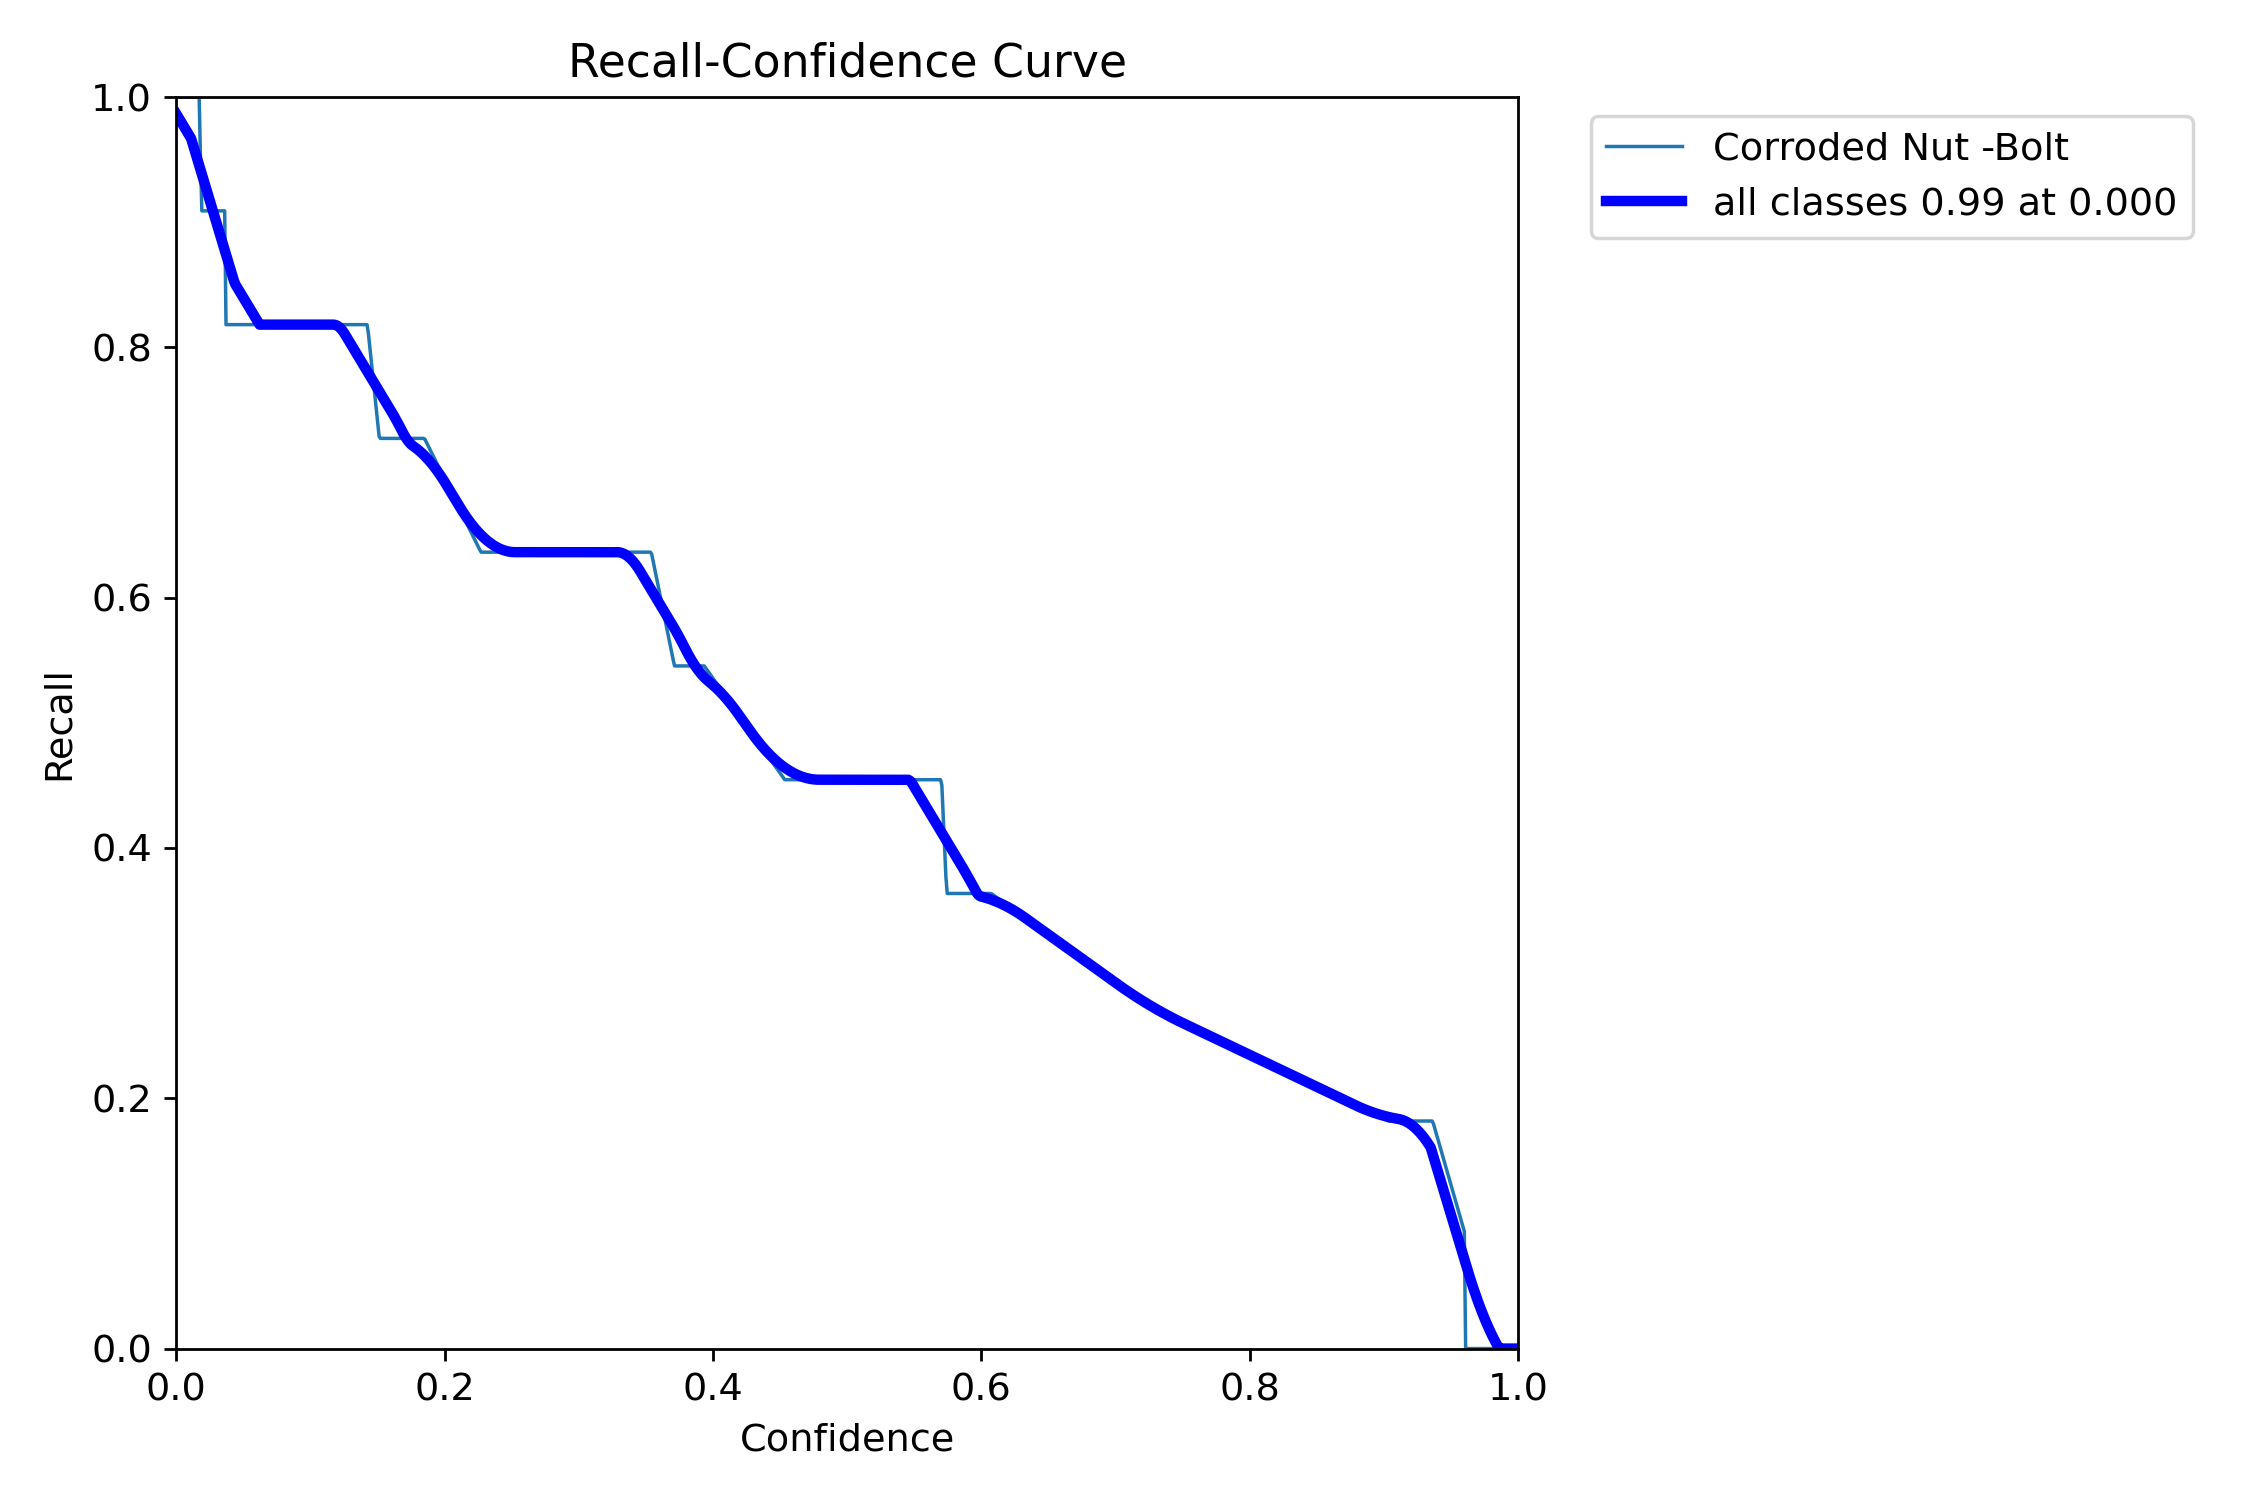

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/training_results/nutbolt/R_curve.png', width=600)

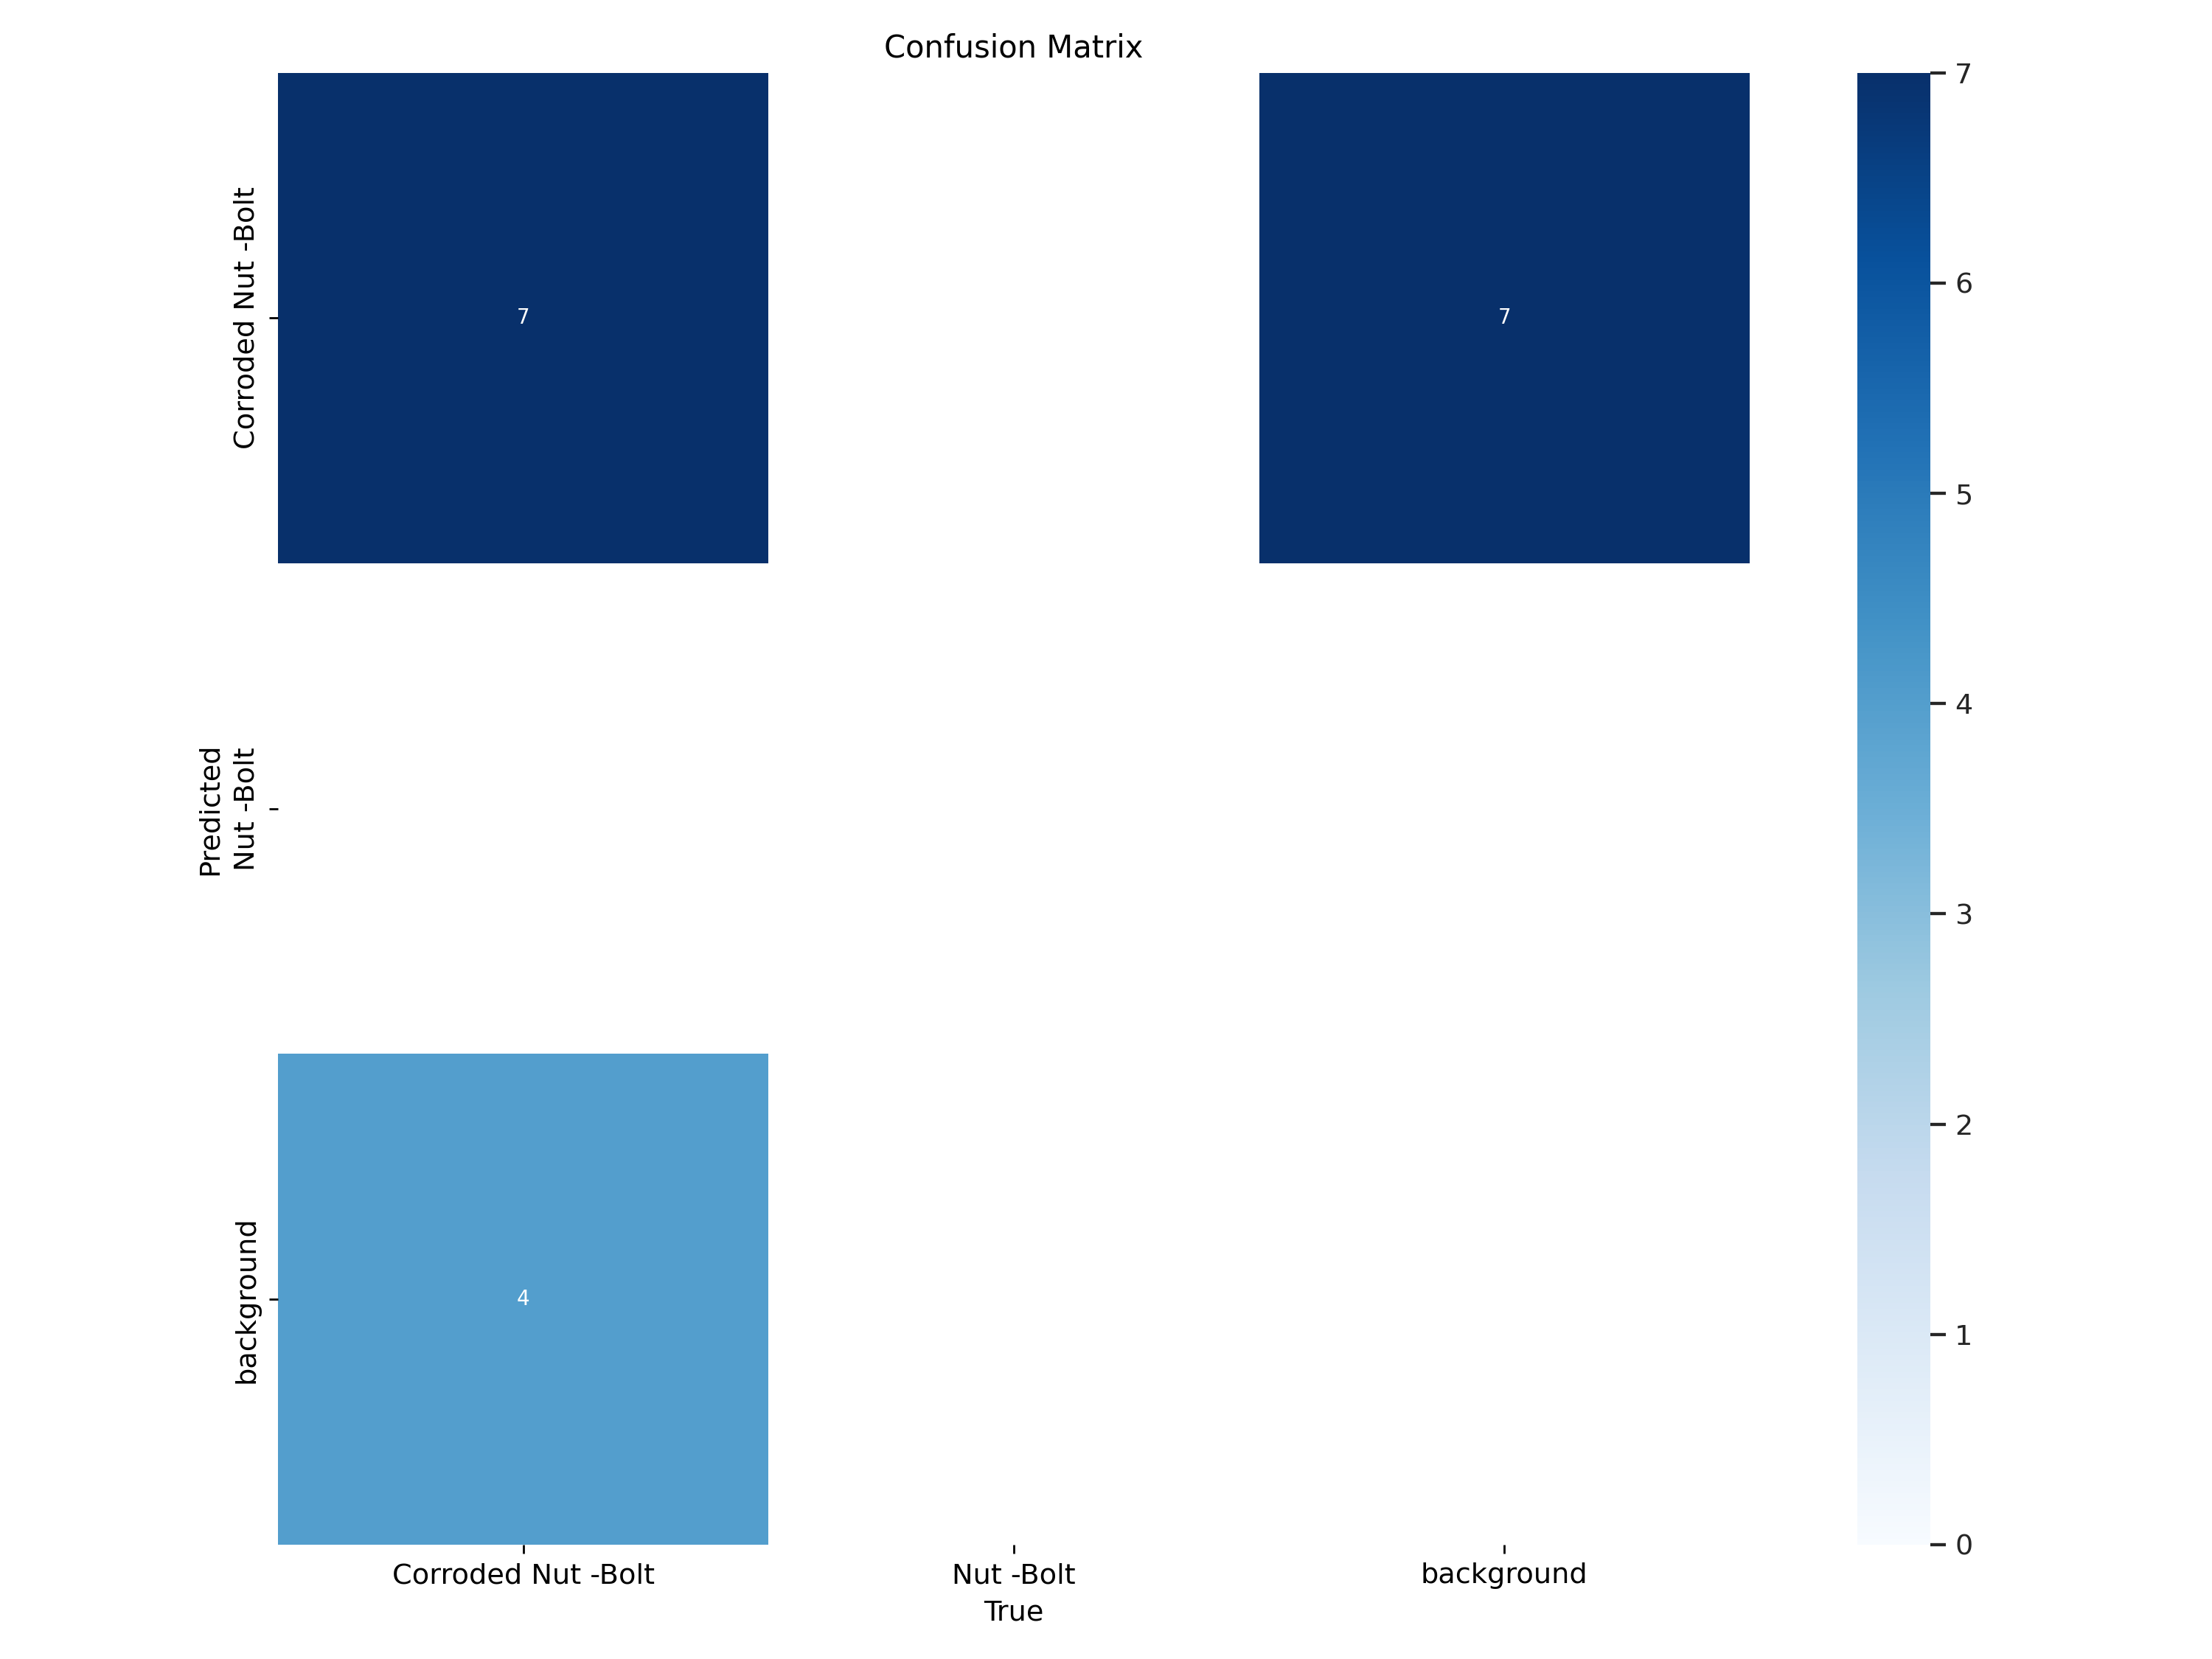

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8/training_results/nutbolt/confusion_matrix.png', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Detection/Training_Results/nutbolt2/weights/best.pt conf=0.55 source=/content/drive/MyDrive/Detection/test_images

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/8 /content/drive/MyDrive/Detection/test_images/1aa (1).jpg: 448x640 (no detections), 801.6ms
image 2/8 /content/drive/MyDrive/Detection/test_images/1aa.jpg: 448x640 (no detections), 729.6ms
image 3/8 /content/drive/MyDrive/Detection/test_images/2aa (1).jpg: 448x640 1 Corroded Nut -Bolt, 763.2ms
image 4/8 /content/drive/MyDrive/Detection/test_images/2aa.jpg: 448x640 1 Corroded Nut -Bolt, 474.1ms
image 5/8 /content/drive/MyDrive/Detection/test_images/3aa (1).jpg: 480x640 10 Corroded Nut -Bolts, 483.9ms
image 6/8 /content/drive/MyDrive/Detection/test_images/3aa.jpg: 480x640 10 Corroded Nut -Bolts, 499.4ms
image 7/8 /content/drive/MyDrive/Detection/test_images/4aa (1).jpg: 416x640 (no detections), 430.1ms
image 8/8 /content/drive/MyDrive/Detection/test_images/4aa.jpg: 416x640 (no detections), 407.7ms
Speed: 4.5ms pre

In [ ]:
!yolo detect predict weights yolov8n.pt --source /content/drive/MyDrive/Detection/test_images --save-dir /content/drive/MyDrive/Detection/output


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 758, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 438, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'weights' is not a valid YOLO argument. Similar arguments are i.e. ['weight_decay=0.0005'].

    Arguments received: ['yolo', 'detect', 'predict', 'weights', 'yolov8n.pt', '--source', '/content/drive/MyDrive/Detection/test_images', '--save-dir', '/content/drive/MyDrive/Detection/output']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'segment', 'pose', 'detect'}
                MODE (required) is one of {'train', 'track', 'val', 'benchmark', 'export', 'pr